In [7]:
# Example: Counting Rainy Days
import numpy as np  
import pandas as pd 

rainfall = pd.read_csv("Seattle2014.csv")["PRCP"].values  # load PRCP column as array
inches = rainfall / 254  # convert to inches
print(inches.shape)  # array shape

(365,)


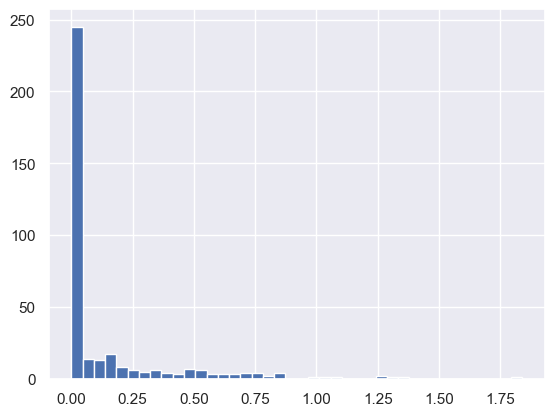

In [11]:
import matplotlib.pyplot as plt  
import seaborn
seaborn.set()  # set seaborn's default plot style

plt.hist(inches, 40)  # plot histogram of rainfall (40 bins)

# Comparison Operators as ufuncs

In [13]:
# 1-D Array
x = np.array([1, 2, 3, 4, 5])

In [18]:
print(x > 3) # greater than
print(x < 3) # less than
print(x <= 3) # less than or equal
print(x >= 3) # greater than or equal
print(x != 3) # not equal
print(x == 3) # equal

# Compound Expression
print((2 * x) == (x ** 2))

[False False False  True  True]
[ True  True False False False]
[ True  True  True False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]
[False  True False False False]


In [26]:
# 2-D Array
rng = np.random.RandomState(0)  # create random generator with seed 0
x = rng.randint(10, size=(3,4))  # generate 3x4 array of random ints from 0 to 9
print(x)  

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [24]:
print(x < 6)

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


# Working with Boolean Arrays

In [27]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [28]:
# Counting entries
np.count_nonzero(x < 6) # how many values less than 6?

8

In [29]:
# Another method to count entries
np.sum(x < 6) # False is interpreted as 0 and True is interpreted as 1

8

In [30]:
# how many values less than 6 in each row?
np.sum(x < 6, axis = 1) 

array([4, 2, 2])

In [31]:
# are there any values greater than 8?
np.any(x > 8)

True

In [32]:
# are there any values less than 0?
np.any(x < 0)

False

In [33]:
# are all values less than 10?
np.all(x < 10)

True

In [34]:
# are all values in each row equal to 6?
np.all(x == 6)

False

In [35]:
# are all values in each row less than 8?
np.all(x < 8, axis = 1)

array([ True, False,  True])

In [37]:
# Boolean operators(Using data of counting rainy days example)
np.sum((inches > 0.5 ) & (inches < 1)) # Days with rainfall between 0.5 and 1.0 inches

29

In [38]:
print("Number of days without rain:", np.sum(inches == 0))
print("Number of days with rain:", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches:", np.sum((inches > 0) & (inches < 0.2)))

Number of days without rain: 215
Number of days with rain: 150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches: 75


# Boolean Arrays as Masks

In [41]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [42]:
print(x[x < 5]) # all values which is less than 5

[0 3 3 3 2 4]


In [46]:
# Statistics operations on counting rainy day examples

# construct a mask of all rainy days
rainy = (inches > 0) 

# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print("Median precipitation on rainy days in 2014 (inches):", np.median(inches[rainy]))
print("Median precipitation on summer days in 2014 (inches):", np.median(inches[summer]))
print("Maximum precipitation on summer days in 2014 (inches):", np.max(inches[summer]))
print("Median precipitation on non-summer days in 2014 (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches): 0.19488188976377951
Median precip on summer days in 2014 (inches): 0.0
Maximum precip on summer days in 2014 (inches): 0.8503937007874016
Median precip on non-summer days in 2014 (inches): 0.20078740157480315


# Using the Keyword and/or Versus the Operators &/|

In [ ]:
# When we use 'and' or 'or', it's equivalent to asking Python to treat the object as a single Boolean entity.
# In Python, all non zero integers will evaluate as 'True'.

In [51]:
bool(42), bool(0) 

(True, False)

In [49]:
bool(42 and 0)

False

In [50]:
bool(42 or 0)

True

In [ ]:
# When we use '&' and '|' on integers, the expression operates on the bits of the element, applying the 'and' 
# or 'or' to the individual bits making up the number.

In [52]:
bin(42) # Here 'bin' is used to print the binary number

'0b101010'

In [53]:
bin(59)

'0b111011'

In [54]:
bin(42 & 59)

'0b101010'

In [55]:
bin(42 | 59)

'0b111011'

In [60]:
# Example-1
A = np.array([1, 0, 1, 0, 1, 0], dtype = bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype = bool)
print(A | B)
# print(A or B) # It will throw an error

[ True  True  True False  True  True]


In [63]:
# Example-2
x = np.arange(10)
print(x)
print((x > 4) & (x < 8))

[0 1 2 3 4 5 6 7 8 9]
[False False False False False  True  True  True False False]


# Exploring Fancy Indexing

In [73]:
rand = np.random.RandomState(42)

x = rand.randint(100, size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [93]:
print([x[3], x[7], x[2]]) # values which is at index 3, 7 & 2

[71, 86, 14]


In [80]:
ind = [3, 7, 2] # array of indices to obtain the same result
print(x[ind])

[71 86 14]


In [76]:
# shape of the result reflects the shape of the index arrays 
ind = np.array([[3, 7],
                [4, 5]])
print(x[ind])

[[71 86]
 [60 20]]


In [77]:
X = np.arange(12).reshape((3, 4))
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [82]:
X = np.array([
    [ 0,  1,  2,  3],  # 2D array
    [ 4,  5,  6,  7],
    [ 8,  9, 10, 11]
])

row = np.array([0, 1, 2])  # row indices
col = np.array([2, 1, 3])  # column indices

print(X[row, col])  

[ 2  5 11]


In [84]:
# If we combine a column vector and a row vector within the indices, then we get a 2-D array
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [85]:
# Example
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

# Combined Indexing

In [86]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [92]:
print(X[2, [0, 1, 2]]) # [row index, list of column indices]

[ 8  9 10]


In [98]:
print(X[1:, [0, 1, 2]]) # 2nd and 3rd row, 1st, 2nd and 3rd column

[[ 4  5  6]
 [ 8  9 10]]


In [101]:
mask = np.array([1, 0, 1, 0], dtype=bool)  # boolean mask selecting columns 0 and 2
print(X[row[:, np.newaxis], mask])          # select rows from 'row' and columns where mask=True

[[ 0  2]
 [ 4  6]
 [ 8 10]]


# Example: Selecting Random Points

In [105]:
mean = [0, 0]                     # Mean vector of the distribution (2D)
cov = [[1, 2],                   # Covariance matrix (2x2) specifying variance and covariance
       [2, 5]]

X = rand.multivariate_normal(mean, cov, 100)  # Generate 100 samples from the 2D Gaussian distribution

print(X.shape)                 

(100, 2)


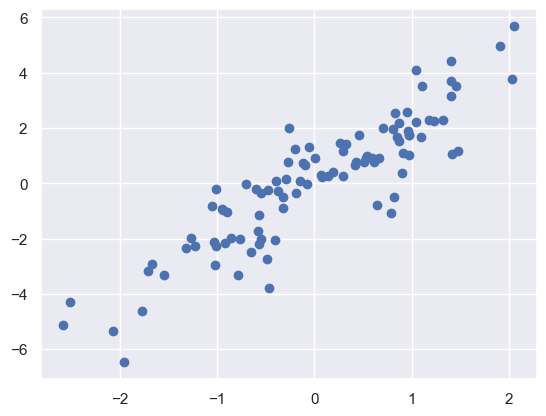

In [106]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set() # for plot styling
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [109]:
indices = np.random.choice(X.shape[0], 20, replace=False)  # randomly select 20 unique row indices from X
print(indices)                                           

[76 79  6 32 74 68 48 51 70 99 98 20 44 89 54 47 49 41 85 36]


In [112]:
selection = X[indices]           # fancy indexing: select rows from X using the indices array
print(selection.shape)           

(20, 2)


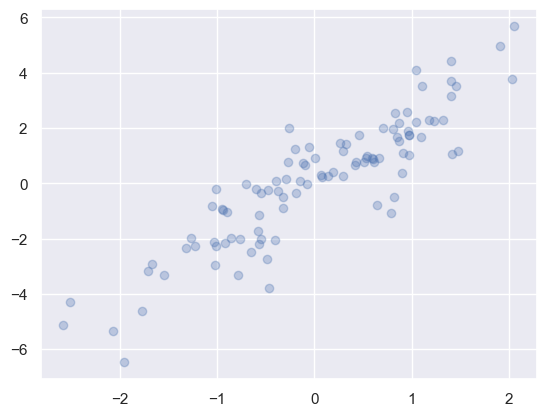

In [114]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)                # plot all data points with low opacity 

plt.scatter(selection[:, 0], selection[:, 1],           # plot the selected 20 points
            facecolor='none', s=200)                    # hollow markers (no fill) with larger size (s=200)

plt.show()                                              

# Modifying Values with Fancy Indexing

In [116]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])

x[i] = 99
print(x)

x[i] -= 10
print(x)

[ 0 99 99  3 99  5  6  7 99  9]
[ 0 89 89  3 89  5  6  7 89  9]


In [122]:
x = np.zeros(10)              

x[[0, 0]] = [4, 6]            # assign 4 to x[0], then overwrite it with 6
print(x)                      # output: [6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

i = [2, 3, 3, 4, 4, 4]        # list of indices to increment

x[i] += 1                     # increments x[2], x[3], x[4] each by 1 (duplicates count only once)
print(x)                     

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[6. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


# Example: Bining Data

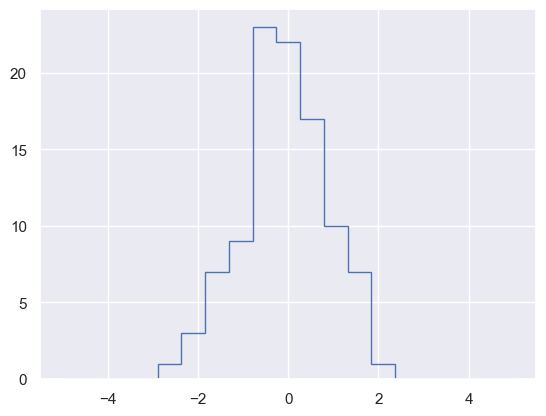

In [130]:
np.random.seed(42)
x = np.random.randn(100) # Generates random numbers from a standard normal distribution (Gaussian distribution),
                         # values can be positive or negative

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

# plot the results
plt.hist(x, bins, histtype = 'step')
plt.show()